In [ ]:
#Problem Statements : Student wants a admission in foregin University so students wants to know if my Gre score 
#ToEFL score,SOP,LOR& CGPA to what chances have to get the admission in that univresity so he want to make model 
#He just wanted tp give that input and return the chances

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Admission_Predict.csv")
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#if we want to do the regression data into classification dataset  we can do that also but for this its contiouse numeric value
#first we want to remove unwanted columns  permanently
df.drop("Serial No.",axis=1,inplace=True)


In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#to check the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

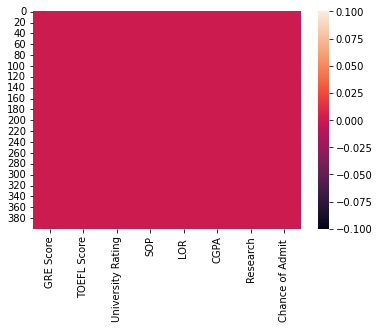

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.shape

(400, 8)

In [ ]:
df.duplicated().sum()    #to check the duplicated values

0

In [ ]:
#now we check the data types
df.dtypes    #mmeans we dont want to do the labelEncoding

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
#select inpit and output
#X=df.drop("Chance of Admit",axis=1)  #input           #means he collect the data from sonewherethen merge it so its nupy array
#Y=df["Chance of Admit"]   #output                      #means we cannot apply axis so we need to iloc


In [ ]:
#we use iloc
X=df.iloc[:,:-1]    #input         #rows then columns  #slicig
Y=df.iloc[:,-1]     #output    

In [ ]:
X.head()  #input

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
Y.head()#output

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#apply scaling on input data mens X_train,X_test
from sklearn.preprocessing import MinMaxScaler  #we take minmaxscler because in this dataset min and max  limit value is given in every columns
#create the object of StandardScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [ ]:
X_train            #after scling it become the numpy array

array([[0.29787234, 0.57142857, 0.25      , ..., 0.57142857, 0.18382353,
        0.        ],
       [0.42553191, 0.35714286, 0.5       , ..., 0.42857143, 0.39338235,
        0.        ],
       [0.14893617, 0.28571429, 0.5       , ..., 0.57142857, 0.38970588,
        0.        ],
       ...,
       [0.68085106, 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.70212766, 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.14893617, 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [ ]:
X_train.shape

(280, 7)

In [ ]:
#aaply neural Netwrok
import tensorflow as tf
#craete the object of Sequential class
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=32,activation='relu',input_shape=(X.shape[1],)),  #created the 1st hidden layers  we can give input_shape=(X.shape[1],) 
    tf.keras.layers.Dense(units=32,activation='relu',),  #craeted second hidden layers
    tf.keras.layers.Dense(units=1,activation='linear')   #output layers|    #we take linear because we want to predict continues numeric value
])
    

In [ ]:
model .summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
#model.compile
model.compile(optimizer='adam',loss='mean_squared_error')  #loss='mse'  #we cannot take accuracy because itsRegression problem

In [ ]:
#create the early stopping to prevent from the overfitting due to epochs(iteration)
#means we create call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=3000,   
                        validation_split=0.2,callbacks=callback)    #we can take validataion_data=(X_test,Y_test) when training data is maximum
                        #validation_split=0.2 means 20% data of training use for check overfitting we cannot use this when its have minimum data

Epoch 1/3000
7/7 [==============================] - 1s 32ms/step - loss: 0.8212 - val_loss: 0.7238
Epoch 2/3000
7/7 [==============================] - 0s 6ms/step - loss: 0.5529 - val_loss: 0.4698
Epoch 3/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.3402 - val_loss: 0.2643
Epoch 4/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.1752 - val_loss: 0.1131
Epoch 5/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.0650 - val_loss: 0.0349
Epoch 6/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.0203 - val_loss: 0.0190
Epoch 7/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0255
Epoch 8/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.0197 - val_loss: 0.0228
Epoch 9/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0179
Epoch 10/3000
7/7 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0163
Epoch 11/3000
7/7 

In [ ]:
#testing the model
Y_pred=model.predict(X_test)
Y_pred

4/4 [==============================] - 0s 4ms/step


array([[0.72946364],
       [0.5819651 ],
       [0.77906525],
       [0.7855257 ],
       [0.83021706],
       [0.64458805],
       [0.6045459 ],
       [0.5344094 ],
       [0.45811814],
       [0.9462523 ],
       [0.7898392 ],
       [0.9196302 ],
       [0.8851653 ],
       [0.65452576],
       [0.74278665],
       [0.6341296 ],
       [0.7872812 ],
       [0.8676918 ],
       [0.5871169 ],
       [0.6930791 ],
       [0.60166043],
       [0.76844853],
       [0.827815  ],
       [0.90941375],
       [0.6860021 ],
       [0.48383826],
       [0.7337957 ],
       [0.7210116 ],
       [0.8779608 ],
       [0.67858744],
       [0.9691787 ],
       [0.6319962 ],
       [0.8440524 ],
       [0.7705951 ],
       [0.7031931 ],
       [0.6184898 ],
       [0.5919981 ],
       [0.61797684],
       [0.90099806],
       [0.6935086 ],
       [0.89121354],
       [0.65842354],
       [0.90708786],
       [0.6686045 ],
       [0.987886  ],
       [0.7447245 ],
       [0.7238368 ],
       [0.810

In [ ]:
#then we check the score in classification we use report in regression we use r2 score
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7842566161478363

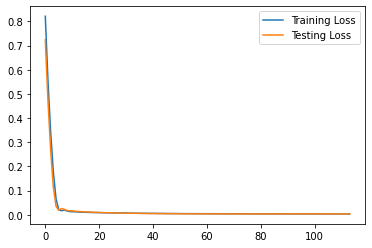

In [ ]:
#Visualize training and testing loss
plt.plot(trained_model.history['loss'],label="Training Loss")
plt.plot(trained_model.history['val_loss'],label="Testing Loss")
plt.legend()
plt.show()             #two lines are  together means not over fitting  

In [ ]:
#but score is goodbut not better so we increase neuron or we increase hidden layer